# Ejemplo Tensorflow Regresión

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

Ahora, creo variables en donde cargo los resultados de la siguiente función que va de $R^2$ a $R^3$, que es lo que entiendo que se busca.
$$
f(x,y)=(x^2,-y^2+2,xy^2)
$$

In [38]:
x = np.linspace(0,10,100)
y = np.linspace(2,23,100)
f1 = np.array([])
f2 = np.array([])
f3 = np.array([])
for i in range(len(x)):
  y1 = x[i]**2
  y2 = (-1)*y[i]+2
  y3 = x[i]*y[i]**2
  f1 = np.append(f1,y1)
  f2 = np.append(f2,y2)
  f3 = np.append(f3,y3)

Ahora junto las variables en columnas de un array de NumPy.

In [39]:
X = np.column_stack((x, y))
Y = np.column_stack((f1, f2, f3))

A continuación, se entrena el modelo, con diferentes cantidades de capas ocultas para las redes neuronales. Y se obtiene algo ya usable.

In [43]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X, Y, epochs=10000, batch_size=10, verbose=3)
scores = model.evaluate(X, Y)

Streaming output truncated to the last 5000 lines.
Epoch 5003/10000
Epoch 5004/10000
Epoch 5005/10000
Epoch 5006/10000
Epoch 5007/10000
Epoch 5008/10000
Epoch 5009/10000
Epoch 5010/10000
Epoch 5011/10000
Epoch 5012/10000
Epoch 5013/10000
Epoch 5014/10000
Epoch 5015/10000
Epoch 5016/10000
Epoch 5017/10000
Epoch 5018/10000
Epoch 5019/10000
Epoch 5020/10000
Epoch 5021/10000
Epoch 5022/10000
Epoch 5023/10000
Epoch 5024/10000
Epoch 5025/10000
Epoch 5026/10000
Epoch 5027/10000
Epoch 5028/10000
Epoch 5029/10000
Epoch 5030/10000
Epoch 5031/10000
Epoch 5032/10000
Epoch 5033/10000
Epoch 5034/10000
Epoch 5035/10000
Epoch 5036/10000
Epoch 5037/10000
Epoch 5038/10000
Epoch 5039/10000
Epoch 5040/10000
Epoch 5041/10000
Epoch 5042/10000
Epoch 5043/10000
Epoch 5044/10000
Epoch 5045/10000
Epoch 5046/10000
Epoch 5047/10000
Epoch 5048/10000
Epoch 5049/10000
Epoch 5050/10000
Epoch 5051/10000
Epoch 5052/10000
Epoch 5053/10000
Epoch 5054/10000
Epoch 5055/10000
Epoch 5056/10000
Epoch 5057/10000
Epoch 5058/100

Ahora, podemos graficar la performance del entrenamiento, a medida que la Pérdida tiende a 0 el modelo es más exacto. Épocas refiere a la cantidad de iteraciones que realiza la IA para acercarse al modelo buscado.

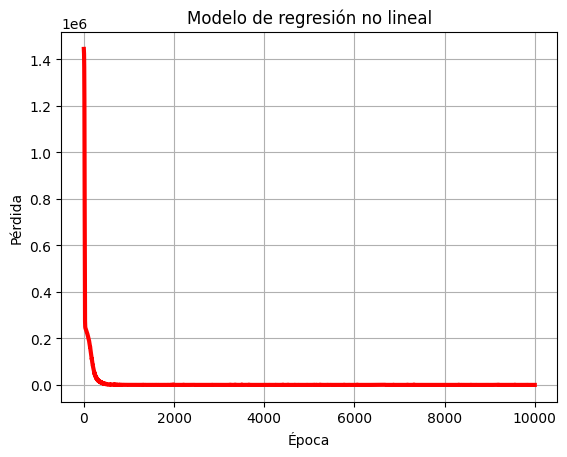

In [44]:
plt.plot(history.history['loss'], linewidth=3, color='r')
plt.title('Modelo de regresión no lineal')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.grid()
plt.show()

Luego de la anterior regresión, toca comparar la performance del modelo con respecto a las funciones planteadas en un inicio.

4/4 [==============================] - 0s 3ms/step


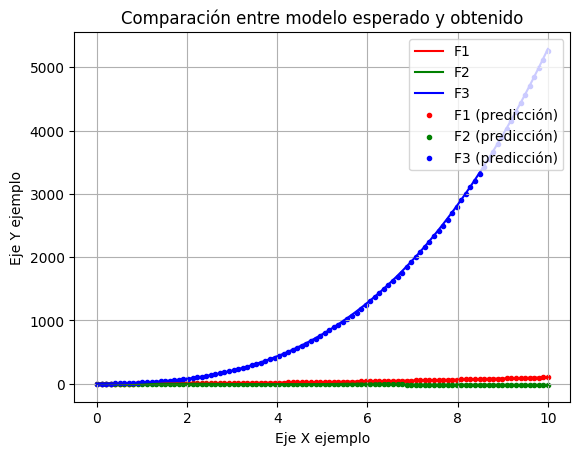

In [45]:
y_pred = model.predict(X)
plt.plot(x, f1, 'r-', label='F1')
plt.plot(x, f2, 'g-', label='F2')
plt.plot(x, f3, 'b-', label='F3')
plt.scatter(x, y_pred[:,0], c='r', marker='.', label='F1 (predicción)')
plt.scatter(x, y_pred[:,1], c='g', marker='.', label='F2 (predicción)')
plt.scatter(x, y_pred[:,2], c='b', marker='.', label='F3 (predicción)')
plt.grid()
plt.legend(loc='upper right')
plt.title('Comparación entre modelo esperado y obtenido')
plt.xlabel('Eje X ejemplo')
plt.ylabel('Eje Y ejemplo')
plt.show()